In [1]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from random import randint

%matplotlib inline

# Loading Data

In [2]:
df = pd.read_csv('data.csv',index_col=0)
df

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0


# correlation matrix

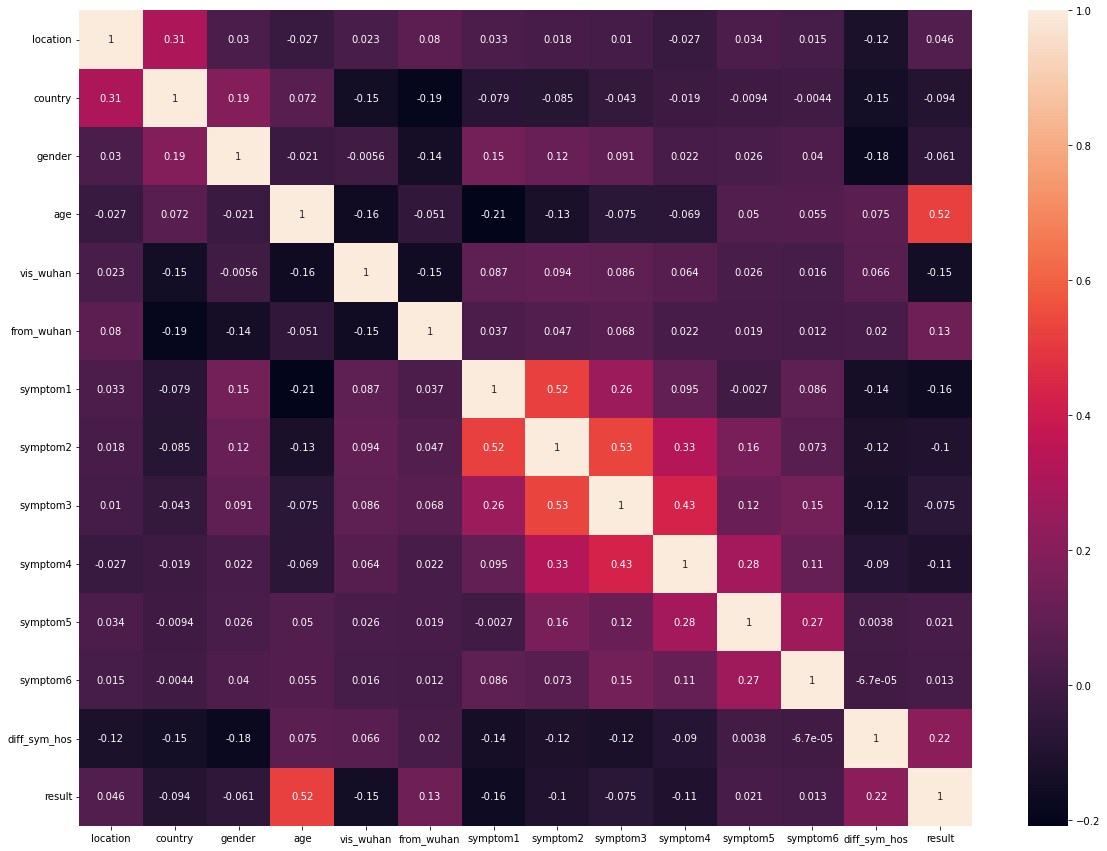

In [3]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True)

In [4]:
test_size = 0.3
cv = 5

# unknown gender and negative hours

In [5]:
df['gender'] = df['gender'].mask(df['gender'] == 2, 1)
for i in range(len(df)):
    df.iloc[i, 12] = df.iloc[i,12]*-1 if df.iloc[i, 12] < 0 else df.iloc[i, 12]

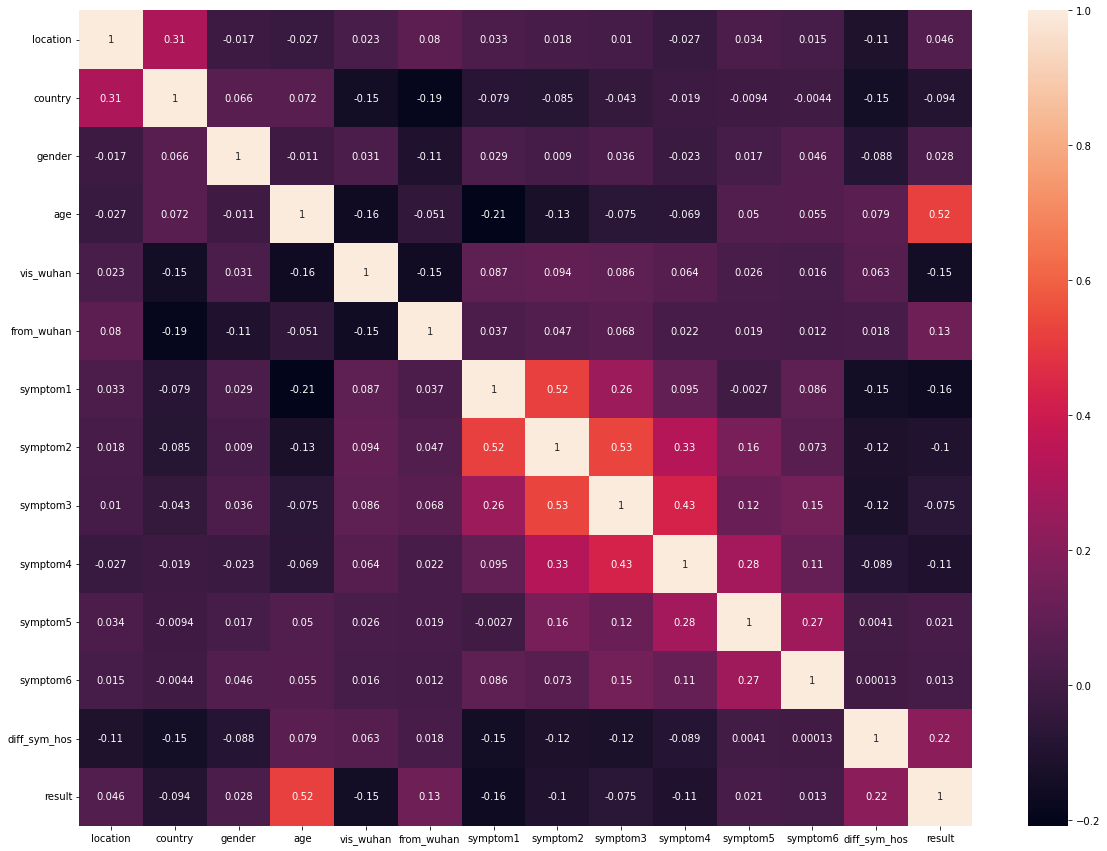

In [6]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True)

# training without one hot encoding

In [7]:
x = df[['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan',
       'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
       'diff_sym_hos']]
y = df['result']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size,shuffle=True, random_state=42)

In [8]:
parameters = {'n_neighbors': np.arange(1, int(len(X_train) ** 0.5), 2),
     'weights':['distance','uniform']}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, parameters, scoring='recall', cv=cv)
best_knn = grid_search.fit(X_train, y_train)
best_knn.fit(X_train, y_train)
y_predict = best_knn.predict(X_test)
precision= precision_score(y_test, y_predict,average=None)
recall = recall_score(y_test,y_predict,average=None)
roc_auc = roc_auc_score(y_test, y_predict)
F1 = f1_score(y_test, y_predict)
print(best_knn.best_estimator_)
precision, recall, F1, roc_auc

KNeighborsClassifier(n_neighbors=3)


(array([0.95238095, 0.75      ]),
 array([0.969163, 0.65625 ]),
 0.7,
 0.8127064977973568)

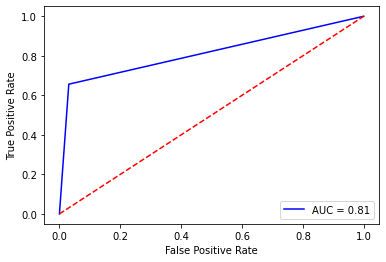

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [10]:
x = df[['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan',
       'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
       'diff_sym_hos']]
y = df['result']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size,shuffle=True, random_state=42)

# encoding
one hot encoding for catagorical data

In [11]:
columns = ['symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6', 'location', 'country']
df_new = df.copy()
for i in columns:
    encoding = pd.get_dummies(df[i], prefix=i)
    df_new = df_new.join(encoding)
    df_new.drop(i, axis=1, inplace=True)
df_new

,gender,age,vis_wuhan,from_wuhan,diff_sym_hos,result,symptom1_0,symptom1_1,symptom1_2,symptom1_3,...,country_24,country_25,country_26,country_27,country_28,country_29,country_30,country_31,country_32,country_33
0,1,66.0,1,0,8,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,56.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,46.0,0,1,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,60.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,58.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,1,24.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
859,1,35.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,1,49.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
861,1,49.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
x = df_new.drop('result', axis=1)
y = df_new['result']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size,shuffle=True, random_state=42)

In [13]:
parameters = {'n_neighbors': np.arange(1, int(len(X_train) ** 0.5), 2),
     'weights':['distance','uniform']}
knn = KNeighborsClassifier(weights='distance')
grid_search = GridSearchCV(knn, parameters, scoring='recall', cv=cv)
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)
y_predict = best_knn.predict(X_test)
precision= precision_score(y_test, y_predict,average=None)
recall = recall_score(y_test,y_predict,average=None)
roc_auc = roc_auc_score(y_test, y_predict)
F1 = f1_score(y_test.values, y_predict)
print(best_knn)
precision, recall, F1, roc_auc
# print(np.asarray(y_test))
# print(y_predict)
# print(y_predict)

KNeighborsClassifier(n_neighbors=1, weights='distance')


(array([0.96137339, 0.88461538]),
 array([0.98678414, 0.71875   ]),
 0.7931034482758621,
 0.8527670704845816)

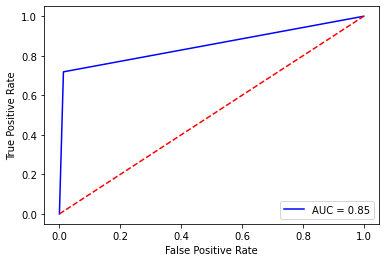

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
from sklearn.ensemble import BaggingClassifier


gnb_bagging = KNeighborsClassifier()
print(gnb_bagging.get_params().keys())
bagging_classifier = BaggingClassifier(gnb_bagging, random_state=42)
# bagging_classifier.fit(X_train, y_train)
parameters = {
    'base_estimator__n_neighbors':np.arange(1, int(len(X_train) ** 0.5), 2),
    'base_estimator__weights':['distance','uniform'],
    'max_features': np.arange(0.5, 1.0, 0.1),
}
grid_search = GridSearchCV(bagging_classifier, parameters, scoring='f1', cv=5)
best_gnb = grid_search.fit(X_train, y_train)
best_gnb.fit(X_train, y_train)
y_predict = best_gnb.predict(X_test)
# accuracy = accuracy_score(y_test,y_predict)
precision= precision_score(y_test, y_predict)
recall = recall_score(y_test,y_predict)
roc_auc = roc_auc_score(y_test, y_predict)
F1 = f1_score(y_test, y_predict)
print(best_gnb.best_estimator_)
precision, recall, F1, roc_auc

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3,
                                                      weights='distance'),
                  max_features=0.8999999999999999, random_state=42)


NameError: name 'accuracy' is not defined

In [21]:
 precision, recall, F1, roc_auc

(0.875, 0.65625, 0.75, 0.8215170704845816)

# Normalization
normalization for age
every time i try normalizing the dff_sym_hos it gives me a warning during training

In [ ]:
scaler = MinMaxScaler()
df_new['age'] = scaler.fit_transform(df_new['age' ].to_numpy()[:,np.newaxis])[:,0]
df_new['diff_sym_hos'] = scaler.fit_transform(df_new['diff_sym_hos'].to_numpy()[:,np.newaxis])[:,0]

In [ ]:
df_new

In [ ]:
x = df_new.drop('result', axis=1)
y = df_new['result']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size,shuffle=True, random_state=42)


In [ ]:
parameters = {'n_neighbors': np.arange(1, int(len(X_train) ** 0.5), 2),
     'weights':['distance','uniform']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, parameters, scoring='f1', cv=cv)
best_knn = grid_search.fit(X_train, y_train)
best_knn.fit(X_train, y_train)
y_predict = best_knn.predict(X_test)
precision= precision_score(y_test, y_predict,average=None)
recall = recall_score(y_test,y_predict,average=None)
roc_auc = roc_auc_score(y_test, y_predict)
F1 = f1_score(y_test, y_predict)
print(best_knn.best_estimator_)
precision, recall, F1, roc_auc

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()